# This isn't yet working!

Merely an example of how the interface should end up. 

In [2]:
from src.model import ocean_section as oc
import pandas as pd

In [3]:
df = pd.read_csv("data/lme_data/seaweed_environment_data_in_nuclear_war.csv") \
    .drop(columns = "dates") # for some reason we don't need this?
df.columns = [
                "name",
                "temperature",
                "salinity",
                "nitrate",
                "illumination",
                "phosphate",
                "ammonium",
            ]
oc.is_raw_ocean_section(df)

In [4]:
# For some reason the nitrate is less than zero at some points
df["nitrate"] = df["nitrate"].clip(lower=0)

In [6]:
dfc = oc.calculate_factors(df)
oc.is_ocean_section(dfc)

In [7]:
# make sure every group has the same number of entries
dfc.groupby("name").count().agg("unique").shape[0] == 1

True

In [34]:
## rebuilding seaweed_model.construct_df_for_parameter
parameter = "salinity_factor"
growth_df = dfc \
    .pivot(columns = "name", values = parameter, index = "months_since_war") \
    .transpose()

growth_df


months_since_war,-3,-2,-1,0,1,2,3,4,5,6,...,227,228,229,230,231,232,233,234,235,236
name,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.961577,0.959478,0.957721,0.962181,0.962246,0.961259,0.958059,0.957495,0.958323,0.961207,...,0.995246,0.994965,0.995538,0.994035,0.993149,0.992878,0.992800,0.992598,0.992214,0.959299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.855773,0.856677,0.857012,0.857021,0.857037,0.857104,0.857324,0.858059,0.859397,0.861677,...,0.900591,0.900598,0.900600,0.900603,0.900606,0.900610,0.900617,0.900633,0.900710,0.853025
63,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
64,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
## Crude check if they are equal as a sanity check
(pd.read_pickle(
                "data" + os.sep + "interim_results" + os.sep
                + parameter + "_LME.pkl"
            ) - growth_df) \
                .max().max()
## I get 0.0, so this seems good.

0.0

In [28]:
def construct_df_for_parameter(parameter:str, df : oc.OceanSections) :
    return(
        df \
        .pivot(columns = "name", values = parameter, index = "months_since_war") \
        .transpose()
    )

In [12]:
import os
import matplotlib.pyplot as plt

In [13]:
plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

In [26]:
## From the plotter_lme.py file
## I decided to copy this here so I could change the end to plt.show()

def cluster_timeseries_all_parameters_q_lines(parameters, lme, lme_dict):
    """
    Plots line plots for all clusters and all parameters
    Arguments:
        parameters: a dictionary of dataframes of all parameters
    Returns:
        None, but saves the plot
    """
    fig, axes = plt.subplots(
        nrows=5, ncols=1, sharey=True, sharex=True, figsize=(10,10 )
    )
    i = 0
    for parameter, parameter_df in parameters.items():
        ax = axes[i]
        lme_df = parameter_df.loc[lme, :]
        lme_df.plot(kind="line", ax=ax, legend=False, color="black", linewidth=2)
        lme_df.plot(kind="line", ax=ax, legend=False, linewidth=1.5)
        ax.set_ylabel(parameter)
        ax.set_xlabel("Months since nuclear war")
        if i == 0:
            ax.set_title("LME: " + lme_dict[lme])
        i += 1

    # plt.savefig(
    #     "results" + os.sep + "lme" + os.sep + "cluster_timeseries_all_param_q_lines_LME_"
    #     + lme_dict[lme] + ".png",
    #     dpi=200,
    #     bbox_inches="tight",
    # )
    # plt.close()
    plt.show()

In [15]:
# I would suggest giving the metadata as an _argument_ to the function, e.g. as a pd.DataFrame
# so that it does not depend on the user having the exact same folder structure + file name.
## copied from the plotter_lme.py file
def create_name_dict():
    """
    Creates a lookup dictionary for the LME names
    Returns:
        A dictionary with LME names
    """
    lme_df = pd.read_csv(
        "data" + os.sep + "geospatial_information" + os.sep + "lme_shp"
        + os.sep + "lme_metadata.csv"
    )
    return dict(zip(lme_df.LME_NUMBER, lme_df.LME_NAME))

In [33]:
lme_dict = create_name_dict()
lme_dict[1]

'East Bering Sea'

In [30]:
parameter_names = [
        "salinity_factor", "nutrient_factor",
        "illumination_factor", "temp_factor", "seaweed_growth_rate"
    ]
parameters = \
    {parameter : construct_df_for_parameter(parameter, df) for parameter in parameter_names}

East Bering Sea


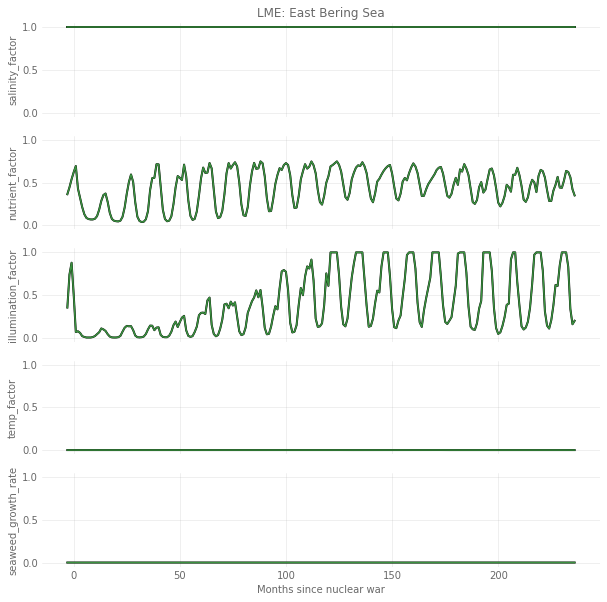

In [48]:
print(lme_dict[1])
cluster_timeseries_all_parameters_q_lines(parameters, 1, lme_dict)

In [ ]:
# To me this looks identical to the picture in the results folder.

Gulf of Alaska


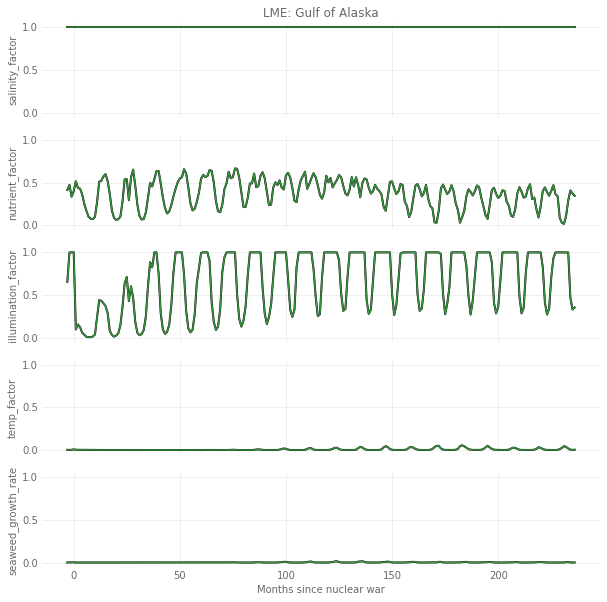

In [47]:
print(lme_dict[2])
cluster_timeseries_all_parameters_q_lines(parameters, 2, lme_dict)